**Going to go through the popular Titanic dataset and try to predict whether a person survived the shipwreck.**

Analysis task:

 1.Separate numeric data and categorical data and perform preprocessing
 
 2.Perform scaling on numeric data & labelling on categorical data
 
 3.Predict survival of passenger based on estimators.
 
 4.Evaluate model for accuracy,precision and recall.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop("PassengerId", axis=1)

In [5]:
df["Fare"].min()

0.0

In [6]:
df["Fare"].max()

512.3292

In [7]:
df.isnull().sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df[df["Sex"]=="male"].mean()

Survived     0.188908
Pclass       2.389948
Age         30.726645
SibSp        0.429809
Parch        0.235702
Fare        25.523893
dtype: float64

In [15]:
df[df["Sex"]=="female"].mean()

Survived     0.742038
Pclass       2.159236
Age         27.915709
SibSp        0.694268
Parch        0.649682
Fare        44.479818
dtype: float64

In [16]:
df["Age"] = df["Age"].fillna(28)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [19]:
## convert he datatypes

df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["SibSp"] = df["SibSp"].astype("category")
df["Parch"] = df["Parch"].astype("category")

In [20]:
df.dtypes

Survived    category
Pclass      category
Sex           object
Age          float64
SibSp       category
Parch       category
Fare         float64
Embarked      object
dtype: object

In [21]:
### separate numerical and categorical datafrmaes

df_num = df.select_dtypes(include = "float64")
df_cat = df.select_dtypes(exclude = "float64")

In [22]:
df_num.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [23]:
df_cat.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [24]:
df_cat = df_cat.drop("Survived", axis=1)

In [25]:
df_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked
0,3,male,1,0,S
1,1,female,1,0,C
2,3,female,0,0,S
3,1,female,1,0,S
4,3,male,0,0,S


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

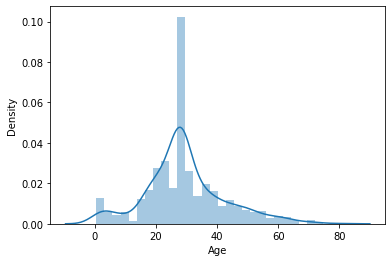

In [26]:
### preproces the numerical dataframe

import seaborn as sns

sns.distplot(df["Age"])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

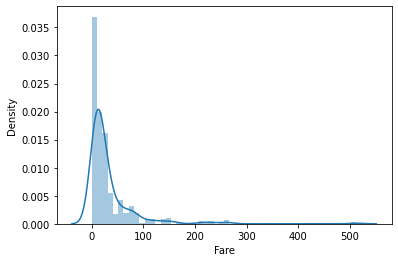

In [31]:
sns.distplot(df_num["Fare"])

In [32]:
df_num["Fare"] = np.log1p(df_num["Fare"])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

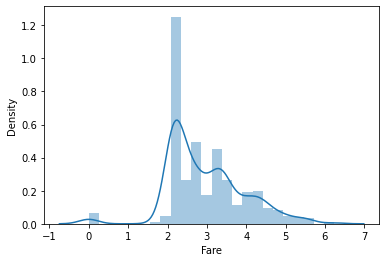

In [34]:
sns.distplot(df_num["Fare"])

from sklearn.preprocessing import MinMaxScaler

In [35]:
mn = MinMaxScaler()
df_mn = mn.fit_transform(df_num )

In [36]:
df_mn_df = pd.DataFrame(df_mn, columns = df_num.columns, index = df_num.index)

In [37]:
df_mn_df.head()

,Age,Fare
0,0.271174,0.338125
1,0.472229,0.685892
2,0.321438,0.350727
3,0.434531,0.639463
4,0.434531,0.352955


In [ ]:
### categorical variable preprocessing

In [38]:
df_cat_dum = pd.get_dummies(df_cat)

In [39]:
df_cat_dum

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
887,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
888,0,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
889,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [40]:
df_final = pd.concat([df_mn_df, df_cat_dum], axis=1)

In [41]:
df_final.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.338125,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0.472229,0.685892,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,0.321438,0.350727,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.434531,0.639463,1,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0.434531,0.352955,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [42]:
X = df_final
y = df["Survived"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [45]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [46]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [47]:
pred = lr.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [50]:
accuracy_score(y_test, pred)

0.7821229050279329

In [51]:
confusion_matrix(y_test, pred)

array([[92, 14],
       [25, 48]])

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       106
           1       0.77      0.66      0.71        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

